In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
Darwin_raw = pd.read_csv(r'Darwin.csv')
Darwin_raw.head(25)
Darwin_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 4 columns):
Year       426 non-null int64
Country    426 non-null object
STATE      194 non-null object
Title      421 non-null object
dtypes: int64(1), object(3)
memory usage: 13.4+ KB


# Understanding what is going on

In [3]:
Darwin_sorted = Darwin_raw.groupby(["Year", "Country"])[["Title"]].count()
Darwin = Darwin_sorted.rename(columns={'Title': 'Count'})

#Saving everything down
Darwin.to_csv(r'Darwin_Fix.csv')
Darwin_raw2 = pd.read_csv(r'Darwin_Fix.csv')
Darwin_raw2

,Year,Country,Count
0,1993,Australia,1
1,1993,England,3
2,1993,USA,11
3,1994,Australia,1
4,1994,Canada,1
5,1994,England,1
6,1994,France,1
7,1994,Northern Ireland,1
8,1994,Russia,1
9,1994,South Africa,1


In [4]:
#Start by figure out how many countries are represented in the data 
Darwin_raw2['Country'].value_counts()

USA                 26
England             15
Australia           11
Canada               7
India                7
Brazil               7
Germany              6
Russia               6
South Africa         6
Romania              6
New Zealand          6
The Netherlands      5
Malaysia             5
France               5
Mexico               5
Croatia              4
Cambodia             4
Italy                4
The Philippines      3
Singapore            3
Japan                3
Scotland             3
Czech Republic       3
Ukraine              3
Finland              3
Spain                3
Indonesia            3
Thailand             3
Zimbabwe             3
Egypt                2
Serbia               2
Belgium              2
Wales                2
Austria              2
Israel               2
Vietnam              2
Kenya                2
Poland               2
Hungary              2
Argentina            2
Belize               1
Tanzania             1
Gabon                1
Denmark    

# Add pop data to table

In [5]:
#Importing pop data
Darwin_pop = pd.read_csv(r'Darwin_pop.csv')

#Renaming column of Pop
Darwin_pop = Darwin_pop.rename(columns = {'Population (millions)': 'Pop'})

#Merging the two DataFrames
Darwin_merged = pd.merge(left = Darwin_raw2,
                        right = Darwin_pop,
                        left_on = 'Country',
                        right_on = 'Country')


# Dropping pop under 4 millions to avoid skewed result

In [6]:
Darwin = Darwin_merged[Darwin_merged['Pop'] >= 4]
Darwin

,Year,Country,Count,Pop
0,1993,Australia,1,24.6
1,1994,Australia,1,24.6
2,1995,Australia,1,24.6
3,1998,Australia,1,24.6
4,1999,Australia,2,24.6
5,2000,Australia,5,24.6
6,2003,Australia,2,24.6
7,2006,Australia,1,24.6
8,2007,Australia,1,24.6
9,2011,Australia,1,24.6


# Calculate each DA for every 1 million inhabitant in the merged DF

In [7]:
def DA_per10mill(row):
    da = row['Count']
    pop = row['Pop']
    return da/pop

Darwin["DA/1mil"] = Darwin.apply(DA_per10mill, axis=1)
Darwin

/home/jblom/.virtualenvs/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Year,Country,Count,Pop,DA/1mil
0,1993,Australia,1,24.6,0.040650
1,1994,Australia,1,24.6,0.040650
2,1995,Australia,1,24.6,0.040650
3,1998,Australia,1,24.6,0.040650
4,1999,Australia,2,24.6,0.081301
5,2000,Australia,5,24.6,0.203252
6,2003,Australia,2,24.6,0.081301
7,2006,Australia,1,24.6,0.040650
8,2007,Australia,1,24.6,0.040650
9,2011,Australia,1,24.6,0.040650


# Changing into PIVOT table

In [8]:
Darwin_pivot = Darwin.pivot_table(index='Country', 
                            columns='Year', 
                            values='DA/1mil', aggfunc=np.sum, margins=True, margins_name = 'Total')
Darwin_pivot

Year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,NaN,NaN,NaN,NaN,NaN,0.022624,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.022624,NaN,NaN,0.045249
Australia,0.040650,0.040650,0.040650,NaN,NaN,0.040650,0.081301,0.203252,NaN,NaN,...,0.040650,NaN,NaN,NaN,NaN,NaN,NaN,0.040650,NaN,0.691057
Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229885
Bangladesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006072
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.265487
Brazil,NaN,NaN,NaN,NaN,0.004778,NaN,NaN,NaN,NaN,0.014333,...,NaN,0.004778,0.004778,NaN,NaN,NaN,NaN,NaN,NaN,0.047778
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.140845
Cambodia,NaN,NaN,NaN,NaN,NaN,NaN,0.062500,0.062500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250000
Canada,NaN,0.027027,NaN,0.054054,NaN,0.027027,NaN,0.108108,0.027027,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.297297


# Finding top 15

In [9]:
Darwin_pivot_sum = Darwin_pivot[ "Total"]
Darwin_pivot_sum.sort_values(ascending = False)

Country
Total              11.430585
New Zealand         1.458333
Croatia             0.975610
Scotland            0.740741
Australia           0.691057
USA                 0.592910
Finland             0.545455
Singapore           0.535714
England             0.485612
Norway              0.384615
The Netherlands     0.352941
Romania             0.306122
Canada              0.297297
Czech Republic      0.285714
Serbia              0.285714
Belgium             0.265487
Cambodia            0.250000
Austria             0.229885
Israel              0.229885
Hungary             0.206186
Costa Rica          0.204082
Zimbabwe            0.181818
Denmark             0.175439
Malaysia            0.158228
Bulgaria            0.140845
Italy               0.132013
South Africa        0.123457
Germany             0.120919
Switzerland         0.119048
Sweden              0.100000
France              0.074627
Ukraine             0.066964
Spain               0.064240
Holland             0.058824
Thaila

In [10]:
Darwin_top_fifteen = Darwin[Darwin["Country"].isin(["New Zealand", 
                                                                    "Croatia", 
                                                                    "Scotland", 
                                                                    "Australia", 
                                                                    "USA", 
                                                                    "Finland",
                                                                    "Singapore",
                                                                    "England",
                                                                    "Norway",
                                                                "The Netherlands", 
                                                                "Romania", 
                                                                "Canada", 
                                                                "Czech Republic", 
                                                                "Serbia",
                                                         "Belgium"])]

#Darwin_top_fifteen

Darwin_top_fifteen_pivot = Darwin_top_fifteen.pivot_table(index='Country', 
                            columns='Year', 
                            values='DA/1mil')
Darwin_top_fifteen_pivot 


Year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0.040650,0.040650,0.040650,NaN,NaN,0.040650,0.081301,0.203252,NaN,NaN,...,NaN,0.040650,NaN,NaN,NaN,NaN,NaN,NaN,0.040650,NaN
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,NaN,0.027027,NaN,0.054054,NaN,0.027027,NaN,0.108108,0.027027,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.243902,0.243902,...,NaN,NaN,NaN,NaN,NaN,0.243902,NaN,NaN,NaN,NaN
Czech Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.095238,NaN
England,0.053957,0.017986,NaN,NaN,NaN,0.017986,0.053957,0.053957,NaN,0.035971,...,NaN,0.017986,NaN,0.017986,0.053957,NaN,0.017986,0.017986,0.000000,NaN
Finland,NaN,NaN,NaN,0.181818,NaN,NaN,NaN,NaN,0.181818,NaN,...,NaN,NaN,NaN,0.181818,NaN,NaN,NaN,NaN,NaN,NaN
New Zealand,NaN,NaN,0.208333,NaN,NaN,NaN,NaN,NaN,0.416667,0.208333,...,NaN,NaN,NaN,NaN,NaN,0.208333,NaN,NaN,0.208333,NaN
Norway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.384615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Changing the index to desceding order

In [11]:
reorderlist = ["Belgium", "Serbia", "Czech Republic", "Canada", "Romania", "The Netherlands", 
               "Norway", "England", "Singapore", "Finland", "USA", "Australia", "Scotland", "Croatia", "New Zealand" ] 
                                                              
                                                                    
Darwin_top_fifteen_pivot = Darwin_top_fifteen_pivot.reindex(reorderlist)
Darwin_top_fifteen_pivot
                               

Year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,,
Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.088496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Serbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Czech Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.095238,NaN
Canada,NaN,0.027027,NaN,0.054054,NaN,0.027027,NaN,0.108108,0.027027,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Romania,NaN,NaN,NaN,NaN,NaN,NaN,0.051020,NaN,NaN,0.051020,...,0.051020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
The Netherlands,NaN,NaN,NaN,NaN,NaN,NaN,0.058824,NaN,NaN,NaN,...,0.058824,NaN,NaN,NaN,0.058824,NaN,NaN,NaN,NaN,NaN
Norway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.384615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
England,0.053957,0.017986,NaN,NaN,NaN,0.017986,0.053957,0.053957,NaN,0.035971,...,NaN,0.017986,NaN,0.017986,0.053957,NaN,0.017986,0.017986,0.000000,NaN
Singapore,NaN,NaN,NaN,NaN,NaN,NaN,0.178571,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.178571,NaN,NaN


# Visualise the result

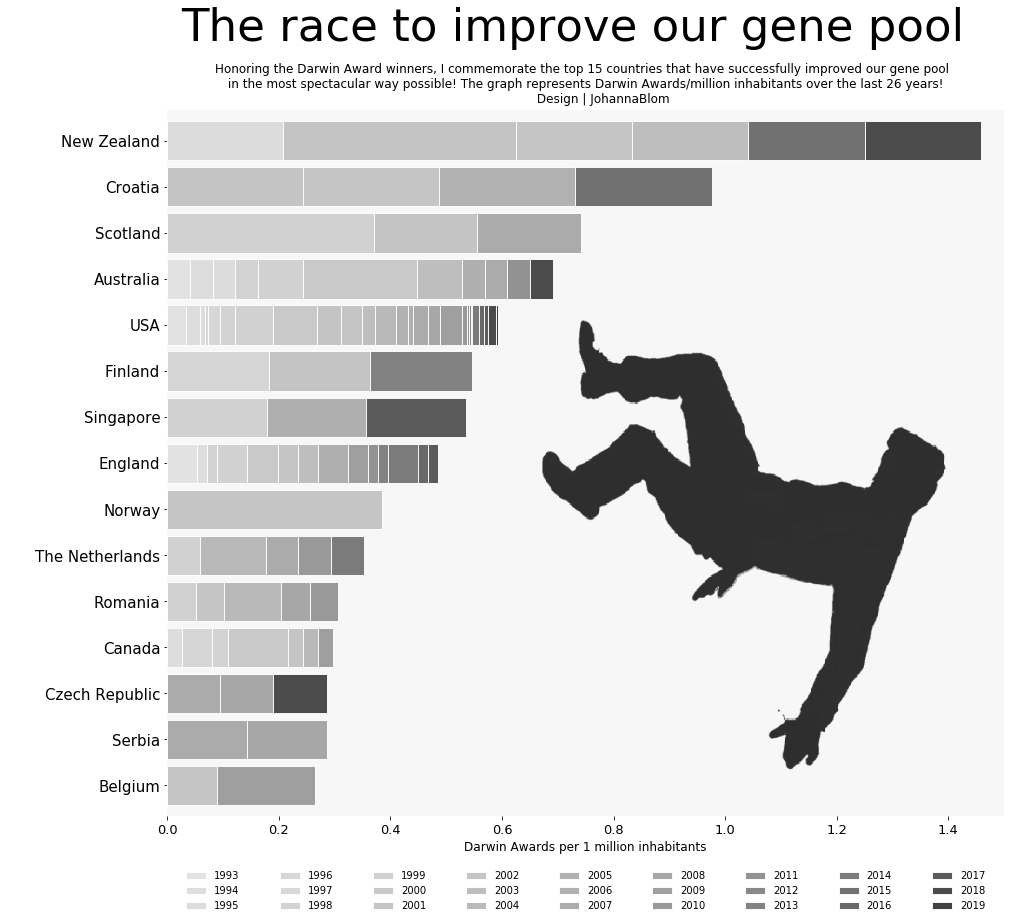

In [12]:
#26 colors for 26 years
colors = ["#E0E0E0", "#DBDBDB","#D9D9D9", "#D3D3D3", "#D4D4D4","#CFCFCF",
         "#CDCDCD", "#C4C4C4","#BFBFBF", "#C0C0C0", "#B8B8B8","#B3B3B3",
         "#AAAAAA", "#A8A8A8","#A3A3A3", "#9E9E9E", "#969696","#8F8F8F",
         "#878787", "#7D7D7D","#757575", "#6E6E6E", "#636363","#595959",
         "#4A4A4A", "#383838", '#2E2E2E']

#Creating the bar chart
stacked_Darwin_top = Darwin_top_fifteen_pivot.plot.barh(figsize=(15, 13), zorder=10, width=0.85, 
                                   stacked = True, alpha = 0.9, color = colors, edgecolor='white')

# ADD IMAGE
img = mpimg.imread(r'falling.png')
stacked_Darwin_top.imshow(img, aspect='auto', origin='upper', extent=[0, 1.5, -6, 15])


#Fixing the legend
stacked_Darwin_top.legend(bbox_to_anchor=(0., 1.02, 1., -1.07), loc='upper center',
           ncol=9, mode="expand", borderaxespad=1.5, frameon = False)

#Adding description  
plt.suptitle("The race to improve our gene pool", fontsize = 45, y = .99)
stacked_Darwin_top.set_title("Honoring the Darwin Award winners, I commemorate the top 15 countries that have successfully improved our gene pool  \n in the most spectacular way possible! The graph represents Darwin Awards/million inhabitants over the last 26 years! \n         Design | JohannaBlom\n" , fontsize = 12, y = .98)
stacked_Darwin_top.set_ylabel(" ", fontsize = 25)
stacked_Darwin_top.set_xlabel("Darwin Awards per 1 million inhabitants", fontsize = 12)
stacked_Darwin_top.tick_params(axis='y', colors='black', labelsize=15)
stacked_Darwin_top.tick_params(axis='x', colors='black', labelsize=13)

# Make things pretty  
stacked_Darwin_top.spines['right'].set_visible(False)
stacked_Darwin_top.spines['top'].set_visible(False)
stacked_Darwin_top.spines['left'].set_visible(False)
stacked_Darwin_top.spines['bottom'].set_visible(False)
